In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train_x = np.arange(20).astype('float32').reshape(-1, 1)
train_y = 3*train_x+1

train_ds = tf.data.Dataset.from_tensor_slices((train_x, train_y))
train_ds = train_ds.shuffle(60000).batch(9)

for x, y in train_ds:
    print(x, y)
    break

# 데이터셋 로드

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
train_ds = train_ds.shuffle(60000).batch(9)

test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels))
test_ds = test_ds.batch(9)

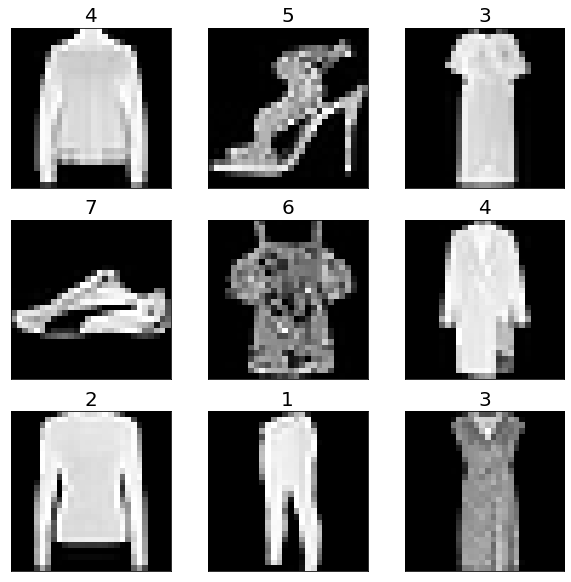

In [19]:
train_ds_iter = iter(train_ds)
images, labels = next(train_ds_iter)

fig, axes = plt.subplots(3, 3, figsize=(10, 10))

for ax_idx, ax in enumerate(axes.flat):
    image = images[ax_idx, ...]
    label = labels[ax_idx]
    
    ax.imshow(image.numpy(), 'gray')
    ax.set_title(label.numpy(), fontsize=20)
    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

---

In [1]:
import tensorflow_datasets as tfds

In [4]:
dataset, ds_info = tfds.load(name='mnist', shuffle_files=True, with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling ~\tensorflow_datasets\mnist\3.0.1.incompleteI30JRU\mnist-train.tfrecord*...:   0%|          | 0/6000…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling ~\tensorflow_datasets\mnist\3.0.1.incompleteI30JRU\mnist-test.tfrecord*...:   0%|          | 0/10000…

Dataset mnist downloaded and prepared to ~\tensorflow_datasets\mnist\3.0.1. Subsequent calls will reuse this data.


tf 데이터셋 이용해서 연습 데이터를 가져올 때 info 정보를 같이 가져올 수 있음. features와 splits로 구성 항목 확인 가능

In [6]:
ds_info.features

FeaturesDict({
    'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
})

In [7]:
ds_info.splits

{Split('train'): <SplitInfo num_examples=60000, num_shards=1>,
 Split('test'): <SplitInfo num_examples=10000, num_shards=1>}

dataset 이용해서 사용 목적 별로 분류

In [8]:
train_ds = dataset['train'].batch(32)
test_ds = dataset['test']

as_supervised 옵션을 넣어주면 딕셔너리 형식으로 수작업을 하지 않아도 바로 언패킹해서 images, labels를 사용 가능

In [10]:
import matplotlib.pyplot as plt

In [14]:
dataset, ds_info = tfds.load(name='mnist', shuffle_files=True, with_info=True, as_supervised=True)

In [15]:
train_ds = dataset['train'].batch(32)
test_ds = dataset['test']

In [18]:
for images, labels in train_ds:
    print(images.shape)
    print(labels.shape)
    break

(32, 28, 28, 1)
(32,)


더 생략하고 싶은 경우

In [20]:
(train_ds, test_ds), ds_info = tfds.load(name='mnist', shuffle_files=True, with_info=True, as_supervised=True, split=['train', 'test'])

In [21]:
train_ds = train_ds.batch(32)

In [22]:
for images, labels in train_ds:
    print(images.shape)
    print(labels.shape)
    break

(32, 28, 28, 1)
(32,)


# 다른 데이터셋으로 시도

## patch_camelyon 데이터셋 로드

- as_supervised : 딕셔너리가 아니라 튜플 형식으로 묶어서 줌, 즉 인덱싱이 가능해짐 (편의성 확보)
- split : 데이터셋을 통째로 가져오는 게 아니라 train, test, validation 별로 변수에 저장할 수 있음
- batch_size : 배치 사이즈

In [ ]:
''' 용량이 커서 오래 걸리는 관계로 생략 '''

# (train_ds, validation_ds, test_ds), ds_info = tfds.load(name='patch_camelyon', shuffle_files=True, with_info=True, as_supervised=True, split=['train', 'validation', 'test'])

In [4]:
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
train_ds = train_ds.shuffle(60000).batch(9)

test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels))
test_ds = test_ds.batch(9)

In [10]:
train_ds_iter = iter(train_ds)
images, labels = next(train_ds_iter)

images, labels = images.numpy(), labels.numpy()

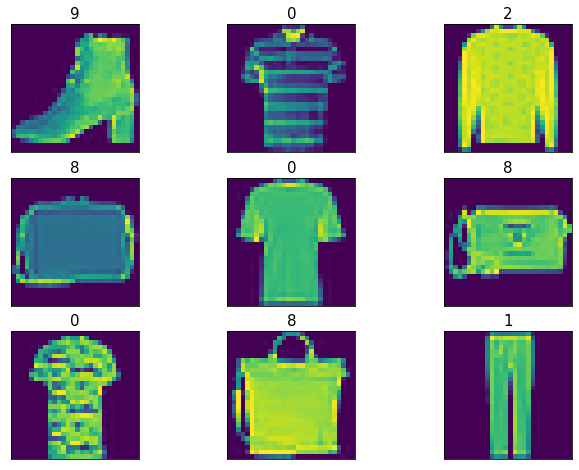

In [14]:
fig, axes = plt.subplots(3, 3, figsize=(11, 8))

for ax_idx, ax in enumerate(axes.flat):
    ax.imshow(images[ax_idx, ...])
    ax.set_title(labels[ax_idx], fontsize=15)
    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)